### Check BioTac data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import torch

#### Global parameters

#### Read data

In [2]:
def plot_signal_by_index(name_convention, dataframe, t_series, ele_cols, indexes):
    fig, ax = plt.subplots(figsize=(15, 7))
    for i in indexes:
        ax.plot(t_series, dataframe.loc[:, ele_cols[i]], label= name_convention + "_ele"+str(i))
    ax.set_xlabel('time')
    ax.set_ylabel('electrode readings')
    ax.grid(True)
    plt.legend(loc='upper right')
    plt.show()

In [3]:
# smooth the signal
def plot_smooth_signal_by_index(name_convention, dataframe, t_series, ele_cols, indexes):
    signals = np.zeros(dataframe.shape)
    print(signals.shape)
    b, a = signal.butter(3, 0.05)

    for i in range(dataframe.shape[1]):
        sig= dataframe.loc[:, ele_cols[i]].to_numpy()
        signals[:,i] = signal.filtfilt(b, a, sig)

    # print(df_ele.columns)
    df_smooth = pd.DataFrame(signals,columns=dataframe.columns)
    # print(df_ele_smooth.head())
    plot_signal_by_index(name_convention, df_smooth, t_series, ele_cols, indexes)

In [4]:
def process_tactile(obj_name, sample_num, plot_indexes, print_head=False, plot_signal=True, plot_smooth_signal=True):
    tactile_file = 'material_data/' + obj_name + '/' + obj_name + '_' + str(sample_num) + '_bio.csv'
    name_convention = obj_name + '_' + str(sample_num)
    print("process BioTac data for: ", tactile_file)
    df_tactile = pd.read_csv(tactile_file, header=0, index_col=False)
    print(df_tactile.shape)
    if print_head:
        print(df_tactile.head())

    # make size (600, 19)
    if df_tactile.shape[0] == 599:
        last_row = df_tactile.iloc[-1:]
        df_tactile = df_tactile.append(last_row)
    # modify the timestamp
    t_series = df_tactile.timestamp
    t_series = t_series - t_series[0]
    
    ele_cols = []
    for col in df_tactile.columns:
        if 'ele' in col:
            ele_cols.append(col)
    df_ele = df_tactile.loc[:, ele_cols]
    print(df_ele.shape)
    
    # plot some of them
    if plot_signal:
        plot_signal_by_index(name_convention, df_ele, t_series, ele_cols, plot_indexes)
    
    # plot smooth signal
    if plot_smooth_signal:
        plot_smooth_signal_by_index(name_convention, df_ele, t_series, ele_cols, plot_indexes)

In [5]:
obj_name = 'mat2'
sample_num = 5

eles = [1, 16, 11]

process BioTac data for:  material_data/mat2/mat2_5_bio.csv
(600, 45)
(600, 19)


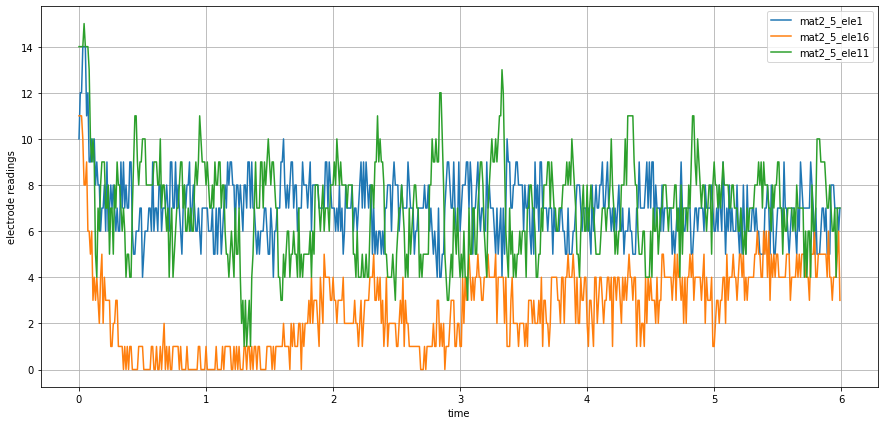

(600, 19)


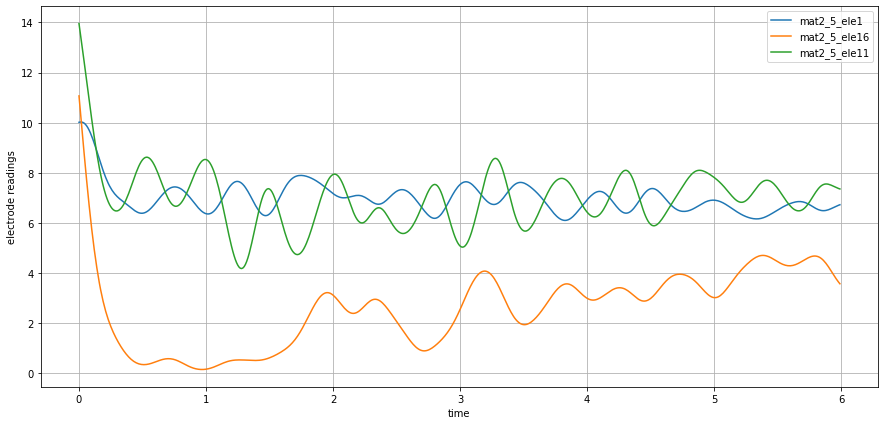

In [6]:
process_tactile(obj_name,sample_num, eles)

process BioTac data for:  material_data/mat7/mat7_2_bio.csv
(600, 45)
(600, 19)
(600, 19)


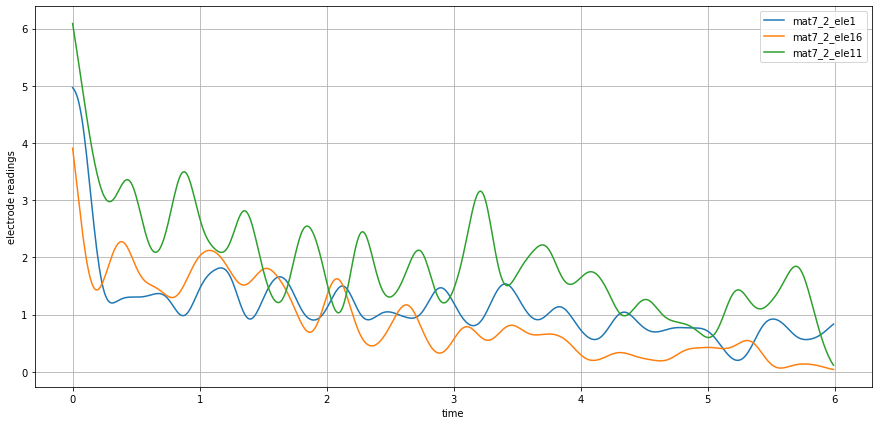

In [7]:
process_tactile('mat7',2, eles, plot_signal=False)

process_tactile('mat7',4, eles, plot_signal=False)

In [18]:
def smoothen_ele(obj_name, sample_num):
    tactile_file = 'material_data/' + obj_name + '/' + obj_name + '_' + str(sample_num) + '_bio.csv'
    name_convention = obj_name + '_' + str(sample_num)
    print("process BioTac data for: ", tactile_file)
    df_tactile = pd.read_csv(tactile_file, header=0, index_col=False)
    
    # make size (600, 19)
    if df_tactile.shape[0] == 599:
        last_row = df_tactile.iloc[-1:]
        df_tactile = df_tactile.append(last_row)
    # modify the timestamp
    t_series = df_tactile.timestamp
    t_series = t_series - t_series[0]
    
    ele_cols = []
    for col in df_tactile.columns:
        if 'ele' in col:
            ele_cols.append(col)
    df_ele = df_tactile.loc[:, ele_cols]
    
    # smoothen the signal
    signals = np.zeros(df_ele.shape)
    b, a = signal.butter(3, 0.05)

    for i in range(df_ele.shape[1]):
        sig= df_ele.loc[:, ele_cols[i]].to_numpy()
        signals[:,i] = signal.filtfilt(b, a, sig)

    # print(df_ele.columns)
    df_smooth = pd.DataFrame(signals,columns=df_ele.columns)
#     print("df_smooth", df_smooth.shape) # (600, 19)
    
#     # plot the signaldata_dir
#     plot_indexes = [0, 10]
#     plot_smooth_signal_by_index(name_convention, df_smooth, t_series, ele_cols, plot_indexes)
    
    # store the new smoothened signal
    df_arr = df_smooth.values.astype(int)
    data_dir = '/home/ruihan/BioTac-classifier/pt_data/smooth_ele/'
    torch.save(torch.from_numpy(df_arr), data_dir + name_convention + '.pt')


In [19]:
# after plotting for demonstration, process all data and save smoothened .pt file
object_names = []
num_class = 21
num_samples = 15
for i in range(1,num_class+1):
    object_names.append('mat'+ str(i))

In [20]:
for obj_name in object_names:
    # read object data file
    for sample_num in range(1, num_samples+1):
        smoothen_ele(obj_name, sample_num)

process BioTac data for:  material_data/mat1/mat1_1_bio.csv
process BioTac data for:  material_data/mat1/mat1_2_bio.csv
process BioTac data for:  material_data/mat1/mat1_3_bio.csv
process BioTac data for:  material_data/mat1/mat1_4_bio.csv
process BioTac data for:  material_data/mat1/mat1_5_bio.csv
process BioTac data for:  material_data/mat1/mat1_6_bio.csv
process BioTac data for:  material_data/mat1/mat1_7_bio.csv
process BioTac data for:  material_data/mat1/mat1_8_bio.csv
process BioTac data for:  material_data/mat1/mat1_9_bio.csv
process BioTac data for:  material_data/mat1/mat1_10_bio.csv
process BioTac data for:  material_data/mat1/mat1_11_bio.csv
process BioTac data for:  material_data/mat1/mat1_12_bio.csv
process BioTac data for:  material_data/mat1/mat1_13_bio.csv
process BioTac data for:  material_data/mat1/mat1_14_bio.csv
process BioTac data for:  material_data/mat1/mat1_15_bio.csv
process BioTac data for:  material_data/mat2/mat2_1_bio.csv
process BioTac data for:  material

process BioTac data for:  material_data/mat10/mat10_6_bio.csv
process BioTac data for:  material_data/mat10/mat10_7_bio.csv
process BioTac data for:  material_data/mat10/mat10_8_bio.csv
process BioTac data for:  material_data/mat10/mat10_9_bio.csv
process BioTac data for:  material_data/mat10/mat10_10_bio.csv
process BioTac data for:  material_data/mat10/mat10_11_bio.csv
process BioTac data for:  material_data/mat10/mat10_12_bio.csv
process BioTac data for:  material_data/mat10/mat10_13_bio.csv
process BioTac data for:  material_data/mat10/mat10_14_bio.csv
process BioTac data for:  material_data/mat10/mat10_15_bio.csv
process BioTac data for:  material_data/mat11/mat11_1_bio.csv
process BioTac data for:  material_data/mat11/mat11_2_bio.csv
process BioTac data for:  material_data/mat11/mat11_3_bio.csv
process BioTac data for:  material_data/mat11/mat11_4_bio.csv
process BioTac data for:  material_data/mat11/mat11_5_bio.csv
process BioTac data for:  material_data/mat11/mat11_6_bio.csv
pr

process BioTac data for:  material_data/mat19/mat19_7_bio.csv
process BioTac data for:  material_data/mat19/mat19_8_bio.csv
process BioTac data for:  material_data/mat19/mat19_9_bio.csv
process BioTac data for:  material_data/mat19/mat19_10_bio.csv
process BioTac data for:  material_data/mat19/mat19_11_bio.csv
process BioTac data for:  material_data/mat19/mat19_12_bio.csv
process BioTac data for:  material_data/mat19/mat19_13_bio.csv
process BioTac data for:  material_data/mat19/mat19_14_bio.csv
process BioTac data for:  material_data/mat19/mat19_15_bio.csv
process BioTac data for:  material_data/mat20/mat20_1_bio.csv
process BioTac data for:  material_data/mat20/mat20_2_bio.csv
process BioTac data for:  material_data/mat20/mat20_3_bio.csv
process BioTac data for:  material_data/mat20/mat20_4_bio.csv
process BioTac data for:  material_data/mat20/mat20_5_bio.csv
process BioTac data for:  material_data/mat20/mat20_6_bio.csv
process BioTac data for:  material_data/mat20/mat20_7_bio.csv
pr